In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/82104/Desktop/AMZN.csv', header=0,index_col="Date")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2019-04-29 to 2020-04-28
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


In [2]:
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-29  1949.000000  1956.339966  1934.089966  1938.430054  1938.430054   
2019-04-30  1930.099976  1935.709961  1906.949951  1926.520020  1926.520020   
2019-05-01  1933.089966  1943.640015  1910.550049  1911.520020  1911.520020   
2019-05-02  1913.329956  1921.550049  1881.869995  1900.819946  1900.819946   
2019-05-03  1949.000000  1964.400024  1936.000000  1962.459961  1962.459961   

             Volume  
Date                 
2019-04-29  4021300  
2019-04-30  3506000  
2019-05-01  3117000  
2019-05-02  3962900  
2019-05-03  6381600  


In [3]:
data.describe() #기초통계량 minimum과 maximum이 굉장히 크다. 변동성이 굉장히 큼.
# 즉, outlier가 있거나, nonstationary 거나

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,1880.832135,1899.364467,1861.542926,1881.418220,1881.418220,4.097547e+06
std,144.536453,149.208714,140.617158,144.308133,144.308133,2.039203e+06
min,1641.510010,1725.000000,1626.030029,1676.609985,1676.609985,8.813000e+05
25%,1778.010010,1793.770020,1762.680054,1784.030029,1784.030029,2.763400e+06
50%,1842.010010,1871.319946,1827.349976,1855.319946,1855.319946,3.493200e+06
75%,1930.099976,1949.099976,1906.630005,1922.189941,1922.189941,4.927100e+06
max,2443.199951,2461.000000,2386.050049,2410.219971,2410.219971,1.556730e+07


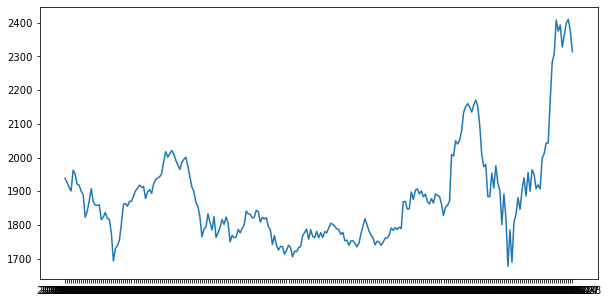

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.show()

# nonstationary의 전형적인 예. 평균라인을 그렸을때, 정말 잘 돌아오지를 않는다.

In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\82104\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [5]:
#!pip install statsmodels / times series analysis tsa
from statsmodels.tsa.stattools import adfuller # augmented Dickey-Fuller
result=adfuller(data['Close']) #testing함.
print(result)

# 두번째 적혀있는 0.59가 p-값임. 즉, 단위근검정 귀무가설 H_0 : 단위근이 있다(비정상시계열) 를 받아들인다.
# 정상성을 만족하게 바꿔야함.


(-1.3767742252801614, 0.5933588180241112, 9, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, 2330.001481538131)


In [ ]:
#!python -m pip install --upgrade pip

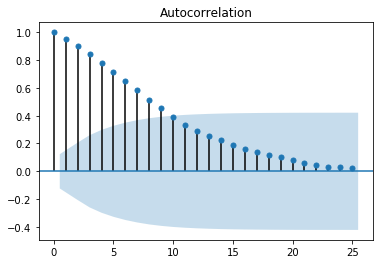

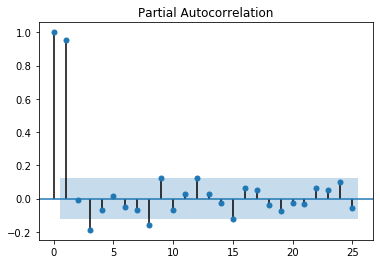

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Close']) #훨씬 더 급하게 줄어야함. 아래의 예는 지수적으로 줄은게 아니라 선형적으로 줄은거임.
plot_pacf(data['Close'])
plt.show()

             Open        High         Low       Close   Adj Close      Volume
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000
mean     0.000780    0.000767    0.000698    0.000703    0.000703    0.001060
std      0.020953    0.016475    0.017950    0.019115    0.019115    0.346114
min     -0.075945   -0.058493   -0.072806   -0.082535   -0.082535   -0.970373
25%     -0.009434   -0.006898   -0.007456   -0.008123   -0.008123   -0.217729
50%      0.001216   -0.000071    0.000985    0.000533    0.000533   -0.033836
75%      0.010245    0.007008    0.008255    0.008820    0.008820    0.183968
max      0.099056    0.093154    0.078766    0.071196    0.071196    1.919016


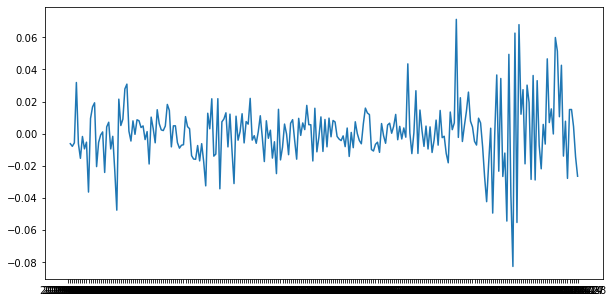

In [10]:
import numpy as np
datapct=data.pct_change() # ( y_t - y_{t-1} ) / y_{t-1} 임.
logreturn=np.log(1+datapct) # 즉, 이게 로그리턴임.
logreturn.head()
print(logreturn.describe())
plt.figure(figsize=(10,5))
plt.plot(logreturn['Close']) 
plt.show()
# 이렇게 막 흔들려야함. 이게 stationary. 막 위아래로, 0중심에서 진동해야함.

In [12]:
from statsmodels.tsa.stattools import adfuller
logreturn=logreturn.dropna() 
# missing 제거 (차분을 했기 때문에 생긴다. : y_1 - y_0 를 할때, 뺄수가 없음.)
# y_0가 없기 떄문. 따라서 dropna()진행.

result=adfuller(logreturn['Close'])
print(result)
# p- : 0.000117 -> H_0 기각

(-4.622864119130824, 0.0001171991981366635, 8, 243, {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}, -1214.5249819073765)


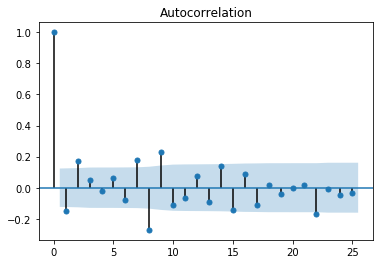

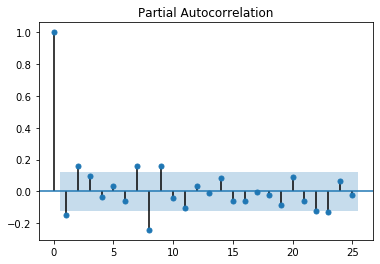

<class 'pandas.core.frame.DataFrame'>


In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(logreturn['Close']) # moving average(MA)를 볼때는 acf를 봄.
plot_pacf(logreturn['Close']) # 우리는 AR 모형을 하고싶어서, 우리는 pacf를 기준으로 보고 잡는다. 
plt.show() # pacf의 24를 적합.
print(type(logreturn))

In [14]:
# y1 ~ y24 -> y25
# y2 ~ y25 -> y26 ... 가 되도록 만들어야함.

# 253개에서, 차분했기 때문에 252개의 데이터를 가지고 있음.

logr1=logreturn['Close'].values
print(type(logr1))
print(logr1.shape)
logr=logr1.reshape(1,-1)
print(logr.shape)
inte=24
x=[]
y=[]
for i in range(logr.shape[1]):
    if i+inte>logr.shape[1]-1:
        break
    else:
         xx=logr[0,i:i+inte]
         x.append(xx)
         yy=logr[0,i+inte]
         y.append(yy)
print(type(x))
print(type(y))
x=np.asarray(x)
y=np.asarray(y)
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
x_train=x[:210]
x_test=x[210:]
y_train=y[:210]
y_test=y[210:] #18개를 썻는데 좀더 줄일필요는 있다.

#주의해야한다. split을 해서 데이터를 쪼개면 안됨. 우리는 순서가 중요하기때문에 그렇다.

<class 'numpy.ndarray'>
(252,)
(1, 252)
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(228, 24)
(228,)


In [15]:
# regression model임. AR모형이랑 정확하게 같다. output 이 1, 24개의 input

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras import regularizers
model=Sequential()
model.add(Dense(1,input_shape=(24,))) 
# 그러나, y_{t-1} 부터 y_{t-24}가 전부 설명력이 다 있는것은 아님.
# pacf의 그림을 보면, 영역 안쪽으로 떨어지는것도 있기 때문(그런게 많음). 따라서 규제화를 줘볼 필요가 있다.
# L1쓰는게 좋아보인다. 해보기. (AR(24)모형)

model.compile(optimizer='rmsprop', loss='mse',metrics=['mae']) #regression model이라 mse를 loss
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Train on 210 samples
Epoch 1/30
210/210 [==============================] - 1s 3ms/sample - loss: 0.0010 - mae: 0.0226
Epoch 2/30
210/210 [==============================] - 0s 143us/sample - loss: 9.9550e-04 - mae: 0.0219
Epoch 3/30
210/210 [==============================] - 0s 207us/sample - loss: 9.7081e-04 - mae: 0.0218
Epoch 4/30
210/210 [==============================] - 0s 205us/sample - loss: 9.5240e-04 - mae: 0.0216
Epoch 5/30
210/210 [==============================] - 0s 138us/sample - loss: 9.3103e-04 - mae: 0.0214
Epoch 6/30
210/210 [==============================] - 0s 143us/sample - loss: 9.1267e-04 - mae: 0.0212
Epoch 7/30
210/210 [==============================] - 0s 143us/sample - loss: 8.9292e-04 - mae: 0.0210
Epoch 8/30
210/210 [==============================] - 0s 105us/sample - loss: 8.7755e-04 - mae: 0.0208
Epoch 9/30
210/210 [==============================] - 0s 95us/sample - loss: 8.6998e-04 - mae: 0.0206
Epoch 10/30
210/210 [==============================] - 0s 1

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(24,))) 
# 딥러닝사용해본것. overfitting이 있지만, 모형은좋음
model.add(Dense(1))                

model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Train on 210 samples
Epoch 1/30
210/210 [==============================] - 0s 2ms/sample - loss: 3.7318e-04 - mae: 0.0136
Epoch 2/30
210/210 [==============================] - 0s 100us/sample - loss: 3.1290e-04 - mae: 0.0127
Epoch 3/30
210/210 [==============================] - 0s 110us/sample - loss: 2.8174e-04 - mae: 0.0120
Epoch 4/30
210/210 [==============================] - 0s 95us/sample - loss: 2.6514e-04 - mae: 0.0116
Epoch 5/30
210/210 [==============================] - 0s 114us/sample - loss: 2.6123e-04 - mae: 0.0116
Epoch 6/30
210/210 [==============================] - 0s 119us/sample - loss: 2.3847e-04 - mae: 0.0112
Epoch 7/30
210/210 [==============================] - 0s 67us/sample - loss: 2.3170e-04 - mae: 0.0110
Epoch 8/30
210/210 [==============================] - 0s 119us/sample - loss: 2.2206e-04 - mae: 0.0109
Epoch 9/30
210/210 [==============================] - 0s 114us/sample - loss: 2.2366e-04 - mae: 0.0110
Epoch 10/30
210/210 [==============================] - 0

In [19]:
x_train=x_train.reshape(-1,1,24)
x_test=x_test.reshape(-1,1,24)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
model=Sequential()
model.add(LSTM(32, input_shape=(1,24)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Train on 210 samples
Epoch 1/30
210/210 [==============================] - 3s 12ms/sample - loss: 3.5267e-04 - mae: 0.0132
Epoch 2/30
210/210 [==============================] - 0s 271us/sample - loss: 3.2285e-04 - mae: 0.0123
Epoch 3/30
210/210 [==============================] - 0s 171us/sample - loss: 3.2290e-04 - mae: 0.0124
Epoch 4/30
210/210 [==============================] - 0s 148us/sample - loss: 3.0456e-04 - mae: 0.0121
Epoch 5/30
210/210 [==============================] - 0s 152us/sample - loss: 2.9767e-04 - mae: 0.0120
Epoch 6/30
210/210 [==============================] - 0s 152us/sample - loss: 2.9276e-04 - mae: 0.0118
Epoch 7/30
210/210 [==============================] - 0s 186us/sample - loss: 2.9188e-04 - mae: 0.0120
Epoch 8/30
210/210 [==============================] - 0s 238us/sample - loss: 2.8567e-04 - mae: 0.0120
Epoch 9/30
210/210 [==============================] - 0s 176us/sample - loss: 2.8109e-04 - mae: 0.0117
Epoch 10/30
210/210 [==============================] 

In [20]:
# 적절히 overfitting이 해결 될 것이다.
model=Sequential()
model.add(GRU(32, input_shape=(1,24)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Train on 210 samples
Epoch 1/30
210/210 [==============================] - 2s 11ms/sample - loss: 4.2707e-04 - mae: 0.0150
Epoch 2/30
210/210 [==============================] - 0s 271us/sample - loss: 3.5108e-04 - mae: 0.0132
Epoch 3/30
210/210 [==============================] - 0s 186us/sample - loss: 3.2308e-04 - mae: 0.0126
Epoch 4/30
210/210 [==============================] - 0s 152us/sample - loss: 3.1260e-04 - mae: 0.0123
Epoch 5/30
210/210 [==============================] - 0s 124us/sample - loss: 2.9297e-04 - mae: 0.0120
Epoch 6/30
210/210 [==============================] - 0s 171us/sample - loss: 3.0231e-04 - mae: 0.0124
Epoch 7/30
210/210 [==============================] - 0s 176us/sample - loss: 2.9848e-04 - mae: 0.0122
Epoch 8/30
210/210 [==============================] - 0s 157us/sample - loss: 2.7830e-04 - mae: 0.0120
Epoch 9/30
210/210 [==============================] - 0s 171us/sample - loss: 2.7085e-04 - mae: 0.0116
Epoch 10/30
210/210 [==============================] 

In [ ]:
#제 8장 과제
#1. validation data를 따로 분리하여 overfitting 점검하고 해결하기

#2. bidirectional  RNN에서 merge_mode를 변화시켜 결과비교하여 해설하기

#3. 시계열 출력층에 L1 규제화를 부여하고 lambda값을 변화시켜 overfitting 관점에서 설명하기

#4. 제출기한:  5/14 오전 10시